## Шифрование данных

### Оглавление
1. Знакомство с данными
2. Умножение матриц
3. Проверка алгоритма преобразования
4. Общий вывод

**План работы**

1. Проверим: если умножить признаки на обратимую матрицу, изменится ли качество линейной регрессии?
2. Если нет, используем этот метод для шифрования данных.
3. Запрограммируем этот алгоритм, применив матричные операции. Проверим, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применим метрику R2.

### 1.Знакомство с данными  и их подготовка к исследованию

<a id='section3.1'></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('F:/DS/Projects/insurance.csv')

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data.tail()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0
4999,1,28.0,40600.0,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
columns =  list(data.columns)
del columns[2]

In [7]:
for element in columns:
    print(element)
    display(data[element].unique())

Пол


array([1, 0], dtype=int64)

Возраст


array([41., 46., 29., 21., 28., 43., 39., 25., 36., 32., 38., 23., 40.,
       34., 26., 42., 27., 33., 47., 30., 19., 31., 22., 20., 24., 18.,
       37., 48., 45., 44., 52., 49., 35., 56., 65., 55., 57., 54., 50.,
       53., 51., 58., 59., 60., 61., 62.])

Члены семьи


array([1, 0, 2, 4, 3, 5, 6], dtype=int64)

Страховые выплаты


array([0, 1, 2, 3, 5, 4], dtype=int64)

In [8]:
data['Зарплата'].describe()

count     5000.000000
mean     39916.360000
std       9900.083569
min       5300.000000
25%      33300.000000
50%      40200.000000
75%      46600.000000
max      79000.000000
Name: Зарплата, dtype: float64

Text(0.5, 1.0, 'Распределение зарплат')

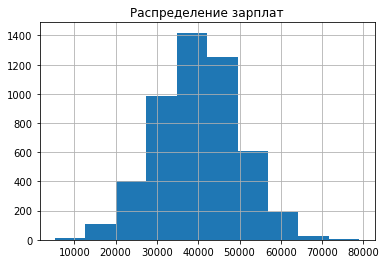

In [9]:
data['Зарплата'].hist()
plt.title('Распределение зарплат')

In [10]:
#Подправим типы данных
data['Возраст'] = data['Возраст'].astype('int64')

**Итоги по разделу**

Пропусков нет, данные более чем в порядке (подправили мелочь - возраст на целые числа). 4 фичи, 1 таргет, 5000 объектов.

In [11]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41,49600.0,1,0
1,0,46,38000.0,1,1
2,0,29,21000.0,0,0
3,0,21,41700.0,2,0
4,1,28,26100.0,0,0


### 2. Умножение матриц

Разобьем данные на фичи и таргет.

In [12]:
features = np.array(data.drop('Страховые выплаты', axis = 1))
target = np.array(data['Страховые выплаты'])

Умножим фичи на обратимую матрицу и посмотрим, изменится ли качество линейной регресии (измерим через r2_score).\
Обратимая матрица - это квадратная матрица, для которой можно найти обратную.\
Мы можем умножить наши фичи на матрицу, если количество ее строк равно количеству столбцов в фичах. То есть 4.
Обратимая матрица должна быть квадратной.\
Итого - размер обратимой матрицы должен быть 4*4.

Создадим случайную матрицу нужного размера.

In [13]:
random_invertible_matrix = np.random.normal(size = (4, 4))
random_invertible_matrix

array([[-0.0283619 ,  0.43808035,  0.16847423,  0.21517964],
       [-0.67390687,  1.21993753,  2.41124598,  0.20554272],
       [-0.97282731,  1.77703494,  0.54856852, -0.99990776],
       [-0.93986262, -1.16555711, -1.38907688,  1.86151803]])

Проверим ее на обратимость.

In [14]:
invertible_test = np.linalg.inv(random_invertible_matrix)
invertible_test

array([[ 1.56693542, -0.23949573, -0.49920597, -0.42283014],
       [ 1.90001093, -0.22901346,  0.19158583, -0.09143262],
       [-0.65080238,  0.45710872, -0.21172377, -0.0889705 ],
       [ 1.49515648,  0.07678561, -0.29007584,  0.20007378]])

Ошибки не появилось, значит, матрица обратима.

Создадим модифицированные фичи умножением наших фичей на эту матрицу.

In [15]:
features_modified = features.dot(random_invertible_matrix)

In [16]:
#Пропишем ручками модель линейной регрессии с помощью классов
class my_LinearRegression:
    def my_fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis = 1)
        Y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
        self.w = w[1:]
        self.w0 = w[0]
        return self.w, self.w0
    
    def my_predict(self, test_features):
        return test_features.dot(self.w) + self.w0

Обучим модель на классических фичах и посмотрим r2.

In [17]:
model = my_LinearRegression()
model.my_fit(features, target)
predictions = model.my_predict(features)
print('r2_classic =', ((r2_score(target, predictions))).round(3))

r2_classic = 0.425


Обучим модель на преобразованных фичах и посмотрим на r2.

In [18]:
model = my_LinearRegression()
model.my_fit(features_modified, target)
predictions = model.my_predict(features_modified)
print('r2_modified =', ((r2_score(target, predictions))).round(3))

r2_modified = 0.425


Практика показывает, что качество модели (r2) при умножении на обратимую матрицу не меняется, сколько раз бы не запускали код.\
А ведь при каждом запуске обратимая матрица становится иной.\
Осталось доказать математически, что это правило истинно.

Мы помним, что задача обучения - это найти вектор весов при фичах, при котором сумма среднеквадратичных отклонений предсказаний от реальных значений минимальна:

$$
w = \arg\min_w MSE(Xw, y)
$$

Такой вектор весов находится по формуле:

$$
w = (X^T X)^{-1} X^T y
$$

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Если мы умножим фичи на обратимую матрицу, то получим преобразованную формулу определения вектора:

$$
w' = ((XP)^T(XP))^{-1}(XP)^Ty
$$

Последовательно преобразуем данную формулу.\
Необходимые свойства операций над матрицами:

$
(AB)^T= B^T A^T
$

$
A(BC) = (AB)C
$

$
(AB)^{-1} = B^-1 A^{-1}
$
*только если A и B квадратные

Помним, что:
$
P и P^T
$
это квадратные матрицы.

$$
w' = ((XP)^T(XP))^{-1}(XP)^Ty
$$
$$
w' = (P^TX^TXP)^{-1}P^TX^Ty
$$

\
Матрица 

$
X^TX
$

\- квадратная.

Произведение квадратных матриц тоже квадратная матрица:

$
P^TX^TX
$

Поэтому:

$$
w' = ((P^TX^TX)P)^{-1}P^TX^Ty
$$
$$
w' = P^{-1}(P^TX^TX)^{-1}P^TX^Ty
$$
$$
w' = P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty
$$

\
При умножении 

$
(P^T)^{-1}P^T
$

получается единичная матрица, а умножение любой матрицы на единичную матрицу дает первоначальную матрицу, поэтому:

$
(P^T)^{-1}P^T = 1
$

$$
w' = P^{-1}(X^TX)^{-1}X^Ty
$$
\
Так как:
$
w = (X^TX)^{-1}X^Ty
$
\
То:
$
w' = P^{-1}w
$

$$
y' = X'w' = (XP)(P^{-1}w) = X(PP^{-1})w = Xw = y
$$

Итого, предсказанные значения без умножения фичей на обратимую матрицу и с умножением равны.\
А значит, и скор будет одинаковым.\
**Важно! Матрица должна быть именно обратимой, чтобы произвести все вышеуказанные преобразования равенства.**

**Итоги по разделу**

Мы выяснили и доказали, что умножение фичей на обратимую матрицу не влияет на предсказания и качество модели.

### 3. Проверка алгоритма преобразования.

Проверим наш алгоритм не на рукописной модели, а на модели из sklearn.\
А также пропишем алгоритм по пунктам.
1. Создаем случайную матрицу нужного размера (квадратная, сторона = количеству фичей)
2. Проверяем ее на обратимость
3. Умножаем на нее наши фичи.
4. Далее работаем с этими фичами как обычно:
 - обучаем модель
 - делаем предсказания
 - проверяем качество
 
Алгоритм достаточно хорош, потому что данные по нему не так просто восстановить.\
Если бы мы, например, умножали или делили на какое-то число все компоненты фичей, то по столбцу с нулями и единицами можно легко было бы восстановить картину.

1. Создадим случайную матрицу нужного размера.

In [19]:
random_invertible_matrix = np.random.normal(size = (4, 4))

2. Проверим ее на обратимость.

In [20]:
invertible_test = np.linalg.inv(random_invertible_matrix)

3. Создадим модифицированные фичи умножением наших фичей на эту матрицу.

In [21]:
features_modified = features.dot(random_invertible_matrix)

4. Посчитаем качество модели на классических фичах

In [22]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print('r2_classic = ', ((r2_score(target, predictions))).round(3))

r2_classic =  0.425


Посчитаем качество модели на зашифрованных фичах.

In [23]:
model = LinearRegression()
model.fit(features_modified, target)
predictions = model.predict(features_modified)
print('r2_modified = ', ((r2_score(target, predictions))).round(3))

r2_modified =  0.425


Да, метод действительно работает.

### 4.Общий вывод

Мы зашифровали данные с помощью умножения на некую случайную обратимую матрицу.\
Метод достаточно хорош, потому что данные по нему не так просто восстановить.\
Если бы мы, например, умножали или делили на какое-то число все компоненты фичей, то по столбцу с нулями и единицами можно легко было бы восстановить картину.\
Также плюс этого метода - экономия ресурсов по сравнению с алгоритмами шифрования, которые требуют много процессорного времени.